![Example Image](DIABETES-TUNE-UP-2023.jpg)


## Importing libraries

In [46]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

## Loading the dataset

In [48]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data information

In [49]:
data.shape

(768, 9)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


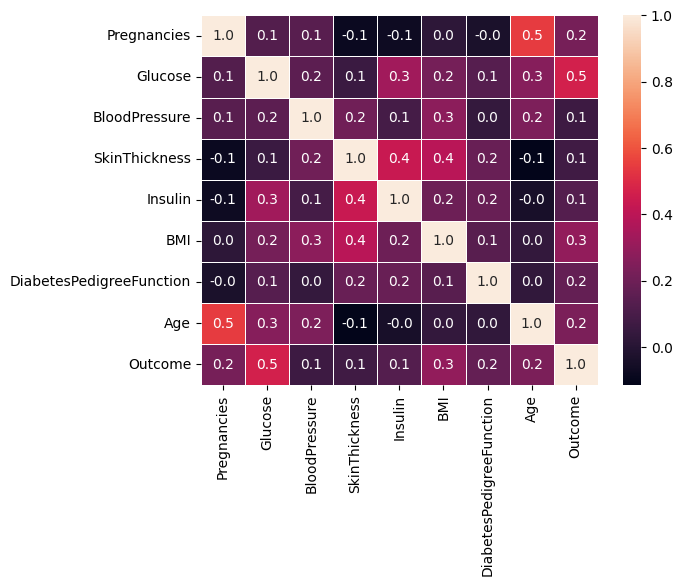

In [52]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,fmt='0.1f',linewidths=0.5)
plt.show()

## Visualizations

<ipython-input-53-8a4d04c319e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome' , data=data ,palette=['g' , 'r'])


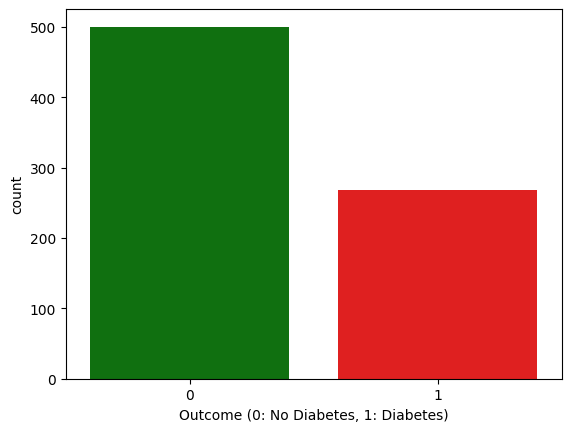

In [53]:
sns.countplot(x='Outcome' , data=data ,palette=['g' , 'r'])
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

The bar chart shows the number of people with and without diabetes in the dataset. There are significantly more people without diabetes (represented by 0) than people with diabetes (represented by 1).

<ipython-input-54-8c5ff09bd478>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 0]['Glucose'], label="No Diabetes", shade=True)
<ipython-input-54-8c5ff09bd478>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Outcome'] == 1]['Glucose'], label="Diabetes", shade=True)


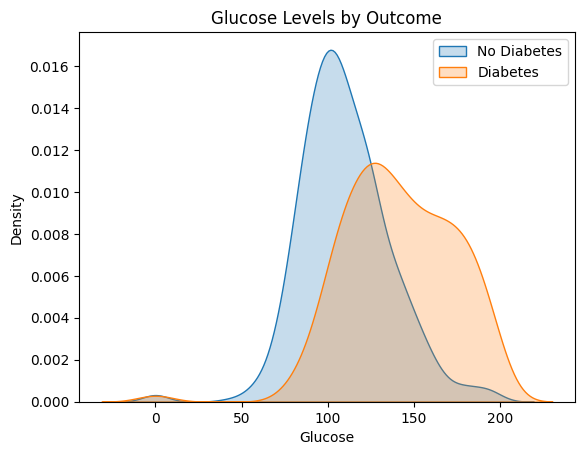

In [54]:
sns.kdeplot(data=data[data['Outcome'] == 0]['Glucose'], label="No Diabetes", shade=True)
sns.kdeplot(data=data[data['Outcome'] == 1]['Glucose'], label="Diabetes", shade=True)
plt.title('Glucose Levels by Outcome')
plt.xlabel('Glucose')
plt.legend()
plt.show()

The graph shows that people with diabetes tend to have much higher blood sugar (glucose) levels than people without diabetes. While there's some gray area where the two groups overlap a bit, a higher glucose reading is a strong sign of diabetes.

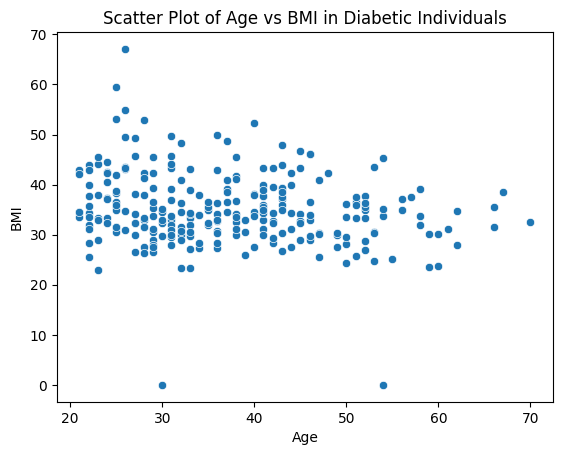

In [55]:
sns.scatterplot(x='Age', y='BMI', data=data[data['Outcome'] == 1])
plt.title('Scatter Plot of Age vs BMI in Diabetic Individuals')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

This scatter plot shows no strong linear relationship between age and BMI in diabetic individuals. Most individuals with diabetes in this dataset have BMIs between 25 and 45, regardless of age. There are a few outliers with unusually low BMIs.

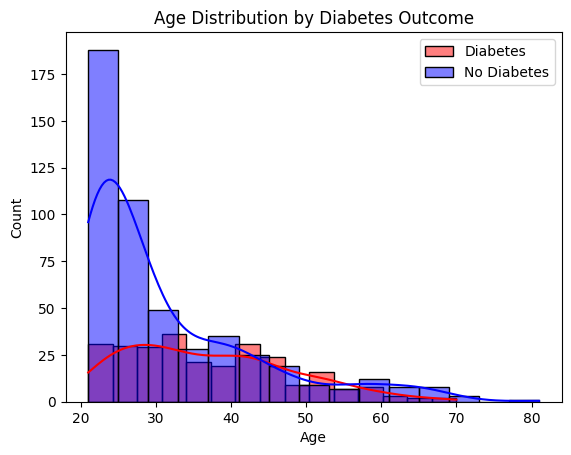

In [56]:
sns.histplot(data[data['Outcome'] == 1]['Age'], color='red', kde=True, label='Diabetes', bins=15)
sns.histplot(data[data['Outcome'] == 0]['Age'], color='blue', kde=True, label='No Diabetes', bins=15)
plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

The graph shows the age distribution of individuals with and without diabetes.
Younger individuals (20-30 years old) are predominantly non-diabetic, while the proportion of diabetic individuals increases with age.
The overlap in distributions suggests age is a contributing factor but not the sole determinant of diabetes.

## Pre-processing

In [58]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [59]:
data.duplicated().sum()

0

## Train-test split

In [60]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Traditional K-means

In [61]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
labels_train = kmeans.labels_
labels_test = kmeans.predict(X_test)

accuracy_train = accuracy_score(y_train, labels_train)
accuracy_test = accuracy_score(y_test, labels_test)
accuracy1=accuracy_test
print("Training Accuracy:", accuracy_train)
print("Training Classification Report:\n", classification_report(y_train, labels_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, labels_train))

print("Testing Accuracy:", accuracy_test)
print("Testing Classification Report:\n", classification_report(y_test, labels_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, labels_test))

Training Accuracy: 0.2718808193668529
Training Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.26      0.32       349
           1       0.18      0.30      0.22       188

    accuracy                           0.27       537
   macro avg       0.29      0.28      0.27       537
weighted avg       0.33      0.27      0.28       537

Confusion Matrix:
 [[ 90 259]
 [132  56]]
Testing Accuracy: 0.31601731601731603
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38       151
           1       0.20      0.31      0.24        80

    accuracy                           0.32       231
   macro avg       0.33      0.32      0.31       231
weighted avg       0.37      0.32      0.33       231

Confusion Matrix:
 [[ 48 103]
 [ 55  25]]


## Rough K-means

In [62]:
class RoughKMeans:
    def __init__(self, n_clusters=2, max_iter=300, tol=0.01):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.kmeans = KMeans(n_clusters=self.n_clusters, max_iter=self.max_iter, tol=self.tol)

    def fit(self, data):
        self.kmeans.fit(data)
        self.cluster_centers_ = self.kmeans.cluster_centers_
        self.labels_ = self.kmeans.labels_
        distances = self.kmeans.transform(data)
        self.lower_bounds = []
        self.upper_bounds = []

        for i in range(self.n_clusters):
            within_cluster = (self.labels_ == i)
            cluster_distances = distances[within_cluster, i]
            threshold = np.percentile(cluster_distances, 75)
            lower_bound = cluster_distances <= threshold
            upper_bound = cluster_distances > threshold
            self.lower_bounds.append(np.where(within_cluster)[0][lower_bound])
            self.upper_bounds.append(np.where(within_cluster)[0][upper_bound])

    def predict(self, data):
        return self.kmeans.predict(data)

rough_kmeans = RoughKMeans(n_clusters=2, max_iter=300, tol=0.01)
rough_kmeans.fit(X_train)
predictions = rough_kmeans.predict(X_test)

In [63]:
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.6796536796536796
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.64      0.72       151
           1       0.53      0.75      0.62        80

    accuracy                           0.68       231
   macro avg       0.68      0.70      0.67       231
weighted avg       0.72      0.68      0.69       231

Confusion Matrix:
 [[97 54]
 [20 60]]


### Different thresholds

In [64]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
X_train, y_train = make_blobs(n_samples=300, centers=3, random_state=42)
X_test, y_test = make_blobs(n_samples=100, centers=3, random_state=42)

class RoughKMeans:
    def __init__(self, n_clusters=2, max_iter=300, tol=0.01):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.kmeans = KMeans(n_clusters=self.n_clusters, max_iter=self.max_iter, tol=self.tol)

    def fit(self, data, threshold_percentile=75):
        self.kmeans.fit(data)
        self.cluster_centers_ = self.kmeans.cluster_centers_
        self.labels_ = self.kmeans.labels_
        distances = self.kmeans.transform(data)
        self.lower_bounds = []
        self.upper_bounds = []

        for i in range(self.n_clusters):
            within_cluster = (self.labels_ == i)
            cluster_distances = distances[within_cluster, i]
            threshold = np.percentile(cluster_distances, threshold_percentile)
            lower_bound = cluster_distances <= threshold
            upper_bound = cluster_distances > threshold
            self.lower_bounds.append(np.where(within_cluster)[0][lower_bound])
            self.upper_bounds.append(np.where(within_cluster)[0][upper_bound])

    def predict(self, data):
        return self.kmeans.predict(data)

# Parameters to tune
threshold_percentiles = [50, 60, 70, 80, 90]
accuracies = []

for threshold in threshold_percentiles:
    print(f"Running RoughKMeans with threshold={threshold}th percentile")
    rough_kmeans = RoughKMeans(n_clusters=3, max_iter=300, tol=0.01)
    rough_kmeans.fit(X_train, threshold_percentile=threshold)


    predictions = rough_kmeans.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Accuracy with threshold {threshold}th percentile: {accuracy:.2f}")
    print("=" * 50)



Running RoughKMeans with threshold=50th percentile
Accuracy with threshold 50th percentile: 0.00
Running RoughKMeans with threshold=60th percentile
Accuracy with threshold 60th percentile: 0.00
Running RoughKMeans with threshold=70th percentile
Accuracy with threshold 70th percentile: 0.34
Running RoughKMeans with threshold=80th percentile
Accuracy with threshold 80th percentile: 0.34
Running RoughKMeans with threshold=90th percentile
Accuracy with threshold 90th percentile: 0.00


## Comparison with other Soft Clustering Model

In [65]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)

# Fit the model to the training data
gmm.fit(X_train)

# Predict clusters for the test data
y_pred = gmm.predict(X_test)


accuracy3=accuracy_score(y_test, y_pred)
print(accuracy3)
print(classification_report(y_test, y_pred))


0.34
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        33

    accuracy                           0.34       100
   macro avg       0.33      0.33      0.33       100
weighted avg       0.34      0.34      0.34       100



## Deep Neural Network

In [66]:
ros = RandomOverSampler(random_state=41)
X_ros,y_ros = ros.fit_resample(X,y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=0)

In [68]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
model = Sequential([

    Dense(150,activation='relu',name='a1',input_shape=(X_train.shape[1],)),
    Dense(100,activation='relu',name='a2'),
    Dense(50,activation='relu',name='a3'),
    Dense(25,activation='relu',name='a4'),
    Dense(1,activation='sigmoid',name='a5')

]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)


In [71]:
model.fit(X_train, y_train,
          epochs=75,
          batch_size=32
         )

Epoch 1/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6347 - loss: 0.5941
Epoch 2/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.4756
Epoch 3/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - loss: 0.5220
Epoch 4/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7446 - loss: 0.4867
Epoch 5/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.4646
Epoch 6/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7732 - loss: 0.4521
Epoch 7/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7830 - loss: 0.4352
Epoch 8/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.4149
Epoch 9/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4095
Epoch 10/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4042
Epoch 11/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7929 - loss: 0.4221
Epoch 12/75
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - lo

In [74]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
        y_pred[i]= 1
    else:
        y_pred[i]= 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [75]:
accuracy4=accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy4 )
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
[[44 10]
 [ 1 45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89        54
           1       0.82      0.98      0.89        46

    accuracy                           0.89       100
   macro avg       0.90      0.90      0.89       100
weighted avg       0.90      0.89      0.89       100



## Comparison

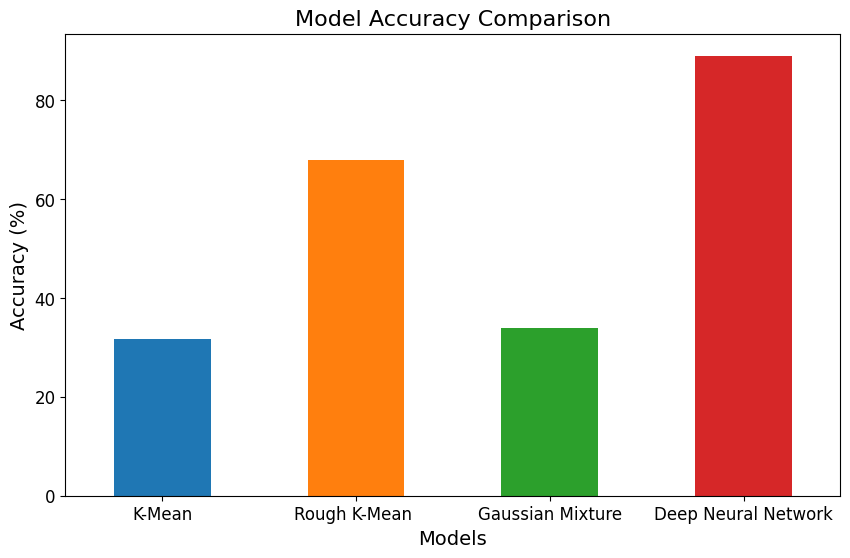

In [77]:
model_compare = pd.DataFrame({
    "K-Mean": [accuracy1 * 100],
    "Rough K-Mean ": [accuracy2 * 100],
    "Gaussian Mixture": [accuracy3 * 100],
    "Deep Neural Network": [accuracy4 * 100]
})


model_compare = model_compare.T
model_compare.columns = ["Accuracy"]

# Simple bar chart with different colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Custom colors
model_compare["Accuracy"].plot.bar(
    figsize=(10, 6), color=colors, legend=False
)

# Titles and labels
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()

The Deep Neural Network significantly outperforms other models (K-Mean, Rough K-Mean, and Gaussian Mixture) in terms of accuracy. Rough K-Mean shows a moderate improvement over basic K-Mean and Gaussian Mixture. Overall, deep learning demonstrates superior performance for this specific task.